In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_squared_log_error

In [2]:
plot_data=top_gdp_countries.head(10)
[['Country','Agriculture','Industry','Service']]
data = pd.read_csv('top_gdp_countries.csv',decimal=',')
print('number of missing data:')
print(data.isnull().sum())
data.describe(include='all')

NameError: name 'top_gdp_countries' is not defined

In [55]:
data.columns=data.columns.str.strip()
print(data.columns.tolist())

['Country', 'Region', 'Population', 'Area_sq_mi', 'Pop_Density_per_sq_mi', 'Coastline_coast_or_area_ratio', 'Net_migration', 'Infant_mortality_per_1000_births', 'GDP_per_capita', 'Literacy', 'Phones_per_1000', 'Arable', 'Crops', 'Other', 'Climate', 'Birthrate', 'Deathrate', 'Agriculture', 'Industry', 'Service', 'Region_label', 'Climate_label', 'Total_GDP ($)']


In [3]:
data.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
Country                               227 non-null object
Region                                227 non-null object
Population                            227 non-null int64
Area (sq. mi.)                        227 non-null int64
Pop. Density (per sq. mi.)            227 non-null float64
Coastline (coast/area ratio)          227 non-null float64
Net migration                         224 non-null float64
Infant mortality (per 1000 births)    224 non-null float64
GDP ($ per capita)                    226 non-null float64
Literacy (%)                          209 non-null float64
Phones (per 1000)                     223 non-null float64
Arable (%)                            225 non-null float64
Crops (%)                             225 non-null float64
Other (%)                             225 non-null float64
Climate                               205 non-null float64
Birthrate       

In [5]:
data.groupby('Region')[['GDP ($ per capita)','Literacy (%)','Agriculture']].median()

,GDP ($ per capita),Literacy (%),Agriculture
Region,,,
ASIA (EX. NEAR EAST),3450.0,90.60,0.1610
BALTICS,11400.0,99.80,0.0400
C.W. OF IND. STATES,3450.0,99.05,0.1980
EASTERN EUROPE,9100.0,98.60,0.0815
LATIN AMER. & CARIB,6300.0,94.05,0.0700
NEAR EAST,9250.0,83.00,0.0350
NORTHERN AFRICA,6000.0,70.00,0.1320
NORTHERN AMERICA,29800.0,97.50,0.0100
OCEANIA,5000.0,95.00,0.1505


### Dealing With Missing Values

In [6]:
for col in data.columns.values:
    if data[col].isnull().sum() == 0:
        continue
    if col == 'Climate':
        guess_values = data.groupby('Region')['Climate'].apply(lambda x: x.mode().max())
    else:
        guess_values = data.groupby('Region')[col].median()
    for region in data['Region'].unique():
        data[col].loc[(data[col].isnull())&(data['Region']==region)] = guess_values[region]

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


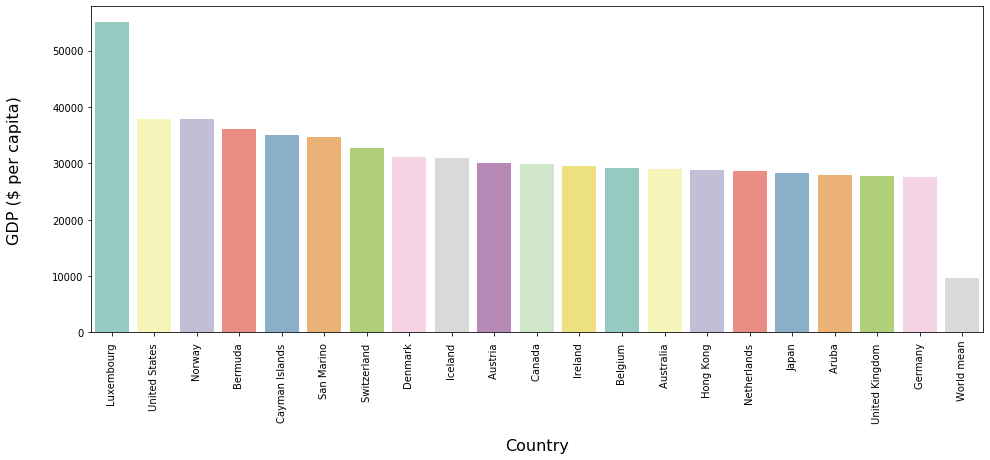

In [7]:
fig, ax = plt.subplots(figsize=(16,6))
#ax = fig.add_subplot(111)
top_gdp_countries = data.sort_values('GDP ($ per capita)',ascending=False).head(20)
mean = pd.DataFrame({'Country':['World mean'], 'GDP ($ per capita)':[data['GDP ($ per capita)'].mean()]})
gdps = pd.concat([top_gdp_countries[['Country','GDP ($ per capita)']],mean],ignore_index=True)

sns.barplot(x='Country',y='GDP ($ per capita)',data=gdps, palette='Set3')
ax.set_xlabel(ax.get_xlabel(),labelpad=15)
ax.set_ylabel(ax.get_ylabel(),labelpad=30)
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
plt.xticks(rotation=90)
plt.show()

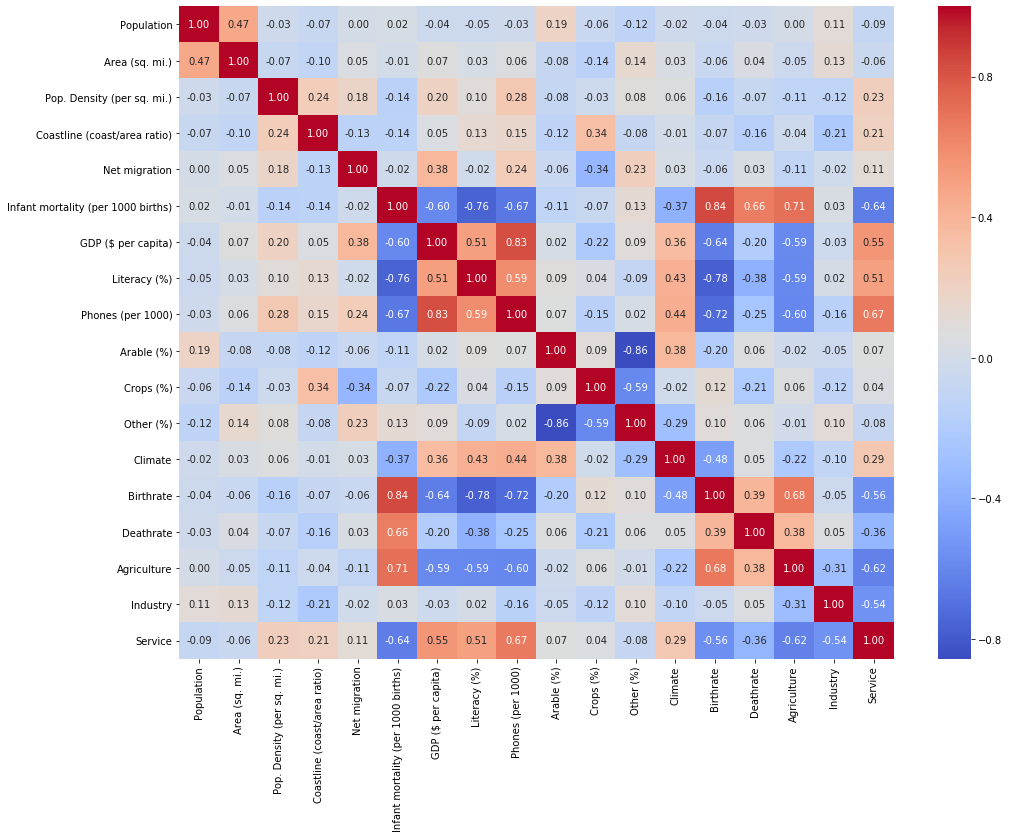

In [8]:
plt.figure(figsize=(16,12))
sns.heatmap(data=data.iloc[:,2:].corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

**We can se some of the columns are highly positively correlated and some negatively corelated**

In [9]:
# Create correlation matrix
corr_matrix = data.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.80)]
# Drop features 
data.drop(data[to_drop], axis=1)

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Arable (%),Crops (%),Climate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.00,12.13,0.22,1.0,20.34,0.3800,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.50,21.09,4.42,3.0,5.22,0.2320,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.00,3.22,0.25,1.0,4.61,0.1010,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.00,10.00,15.00,2.0,3.27,0.1505,0.171,0.644
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.00,2.22,0.00,3.0,6.25,0.0220,0.245,0.720
5,Angola,SUB-SAHARAN AFRICA,12127071,1246700,9.7,0.13,0.00,191.19,1900.0,42.00,2.41,0.24,2.0,24.20,0.0960,0.658,0.246
6,Anguilla,LATIN AMER. & CARIB,13477,102,132.1,59.80,10.76,21.03,8600.0,95.00,0.00,0.00,2.0,5.34,0.0400,0.180,0.780
7,Antigua & Barbuda,LATIN AMER. & CARIB,69108,443,156.0,34.54,-6.15,19.46,11000.0,89.00,18.18,4.55,2.0,5.37,0.0380,0.220,0.743
8,Argentina,LATIN AMER. & CARIB,39921833,2766890,14.4,0.18,0.61,15.18,11200.0,97.10,12.31,0.48,3.0,7.55,0.0950,0.358,0.547
9,Armenia,C.W. OF IND. STATES,2976372,29800,99.9,0.00,-6.47,23.28,3500.0,98.60,17.55,2.30,4.0,8.23,0.2390,0.343,0.418


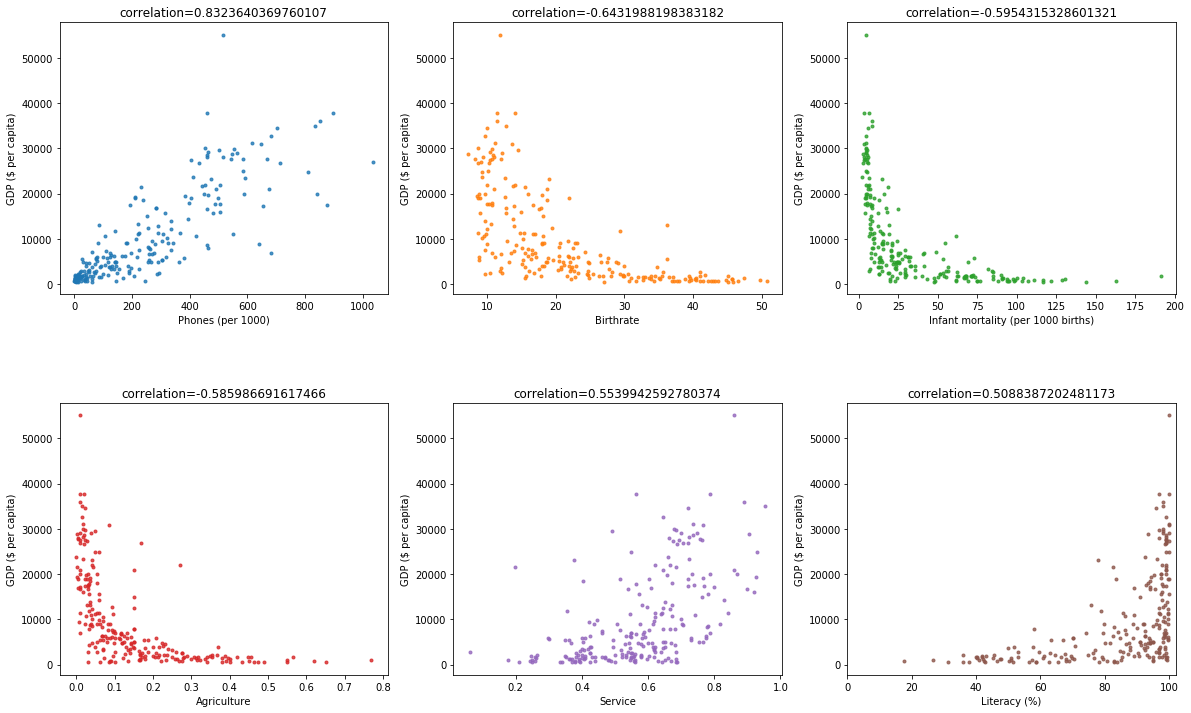

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,12))
plt.subplots_adjust(hspace=0.4)

corr_to_gdp = pd.Series()
for col in data.columns.values[2:]:
    if ((col!='GDP ($ per capita)')&(col!='Climate')):
        corr_to_gdp[col] = data['GDP ($ per capita)'].corr(data[col])
abs_corr_to_gdp = corr_to_gdp.abs().sort_values(ascending=False)
corr_to_gdp = corr_to_gdp.loc[abs_corr_to_gdp.index]

for i in range(2):
    for j in range(3):
        sns.regplot(x=corr_to_gdp.index.values[i*3+j], y='GDP ($ per capita)', data=data,
                   ax=axes[i,j], fit_reg=False, marker='.')
        title = 'correlation='+str(corr_to_gdp[i*3+j])
        axes[i,j].set_title(title)
axes[1,2].set_xlim(0,102)
plt.show()

In [11]:
data.loc[(data['Birthrate']<14)&(data['GDP ($ per capita)']<10000)]

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
9,Armenia,C.W. OF IND. STATES,2976372,29800,99.9,0.00,-6.47,23.28,3500.0,98.6,195.7,17.55,2.30,80.15,4.0,12.07,8.23,0.239,0.343,0.418
18,Belarus,C.W. OF IND. STATES,10293011,207600,49.6,0.00,2.54,13.37,6100.0,99.6,319.1,29.55,0.60,69.85,4.0,11.16,14.02,0.093,0.316,0.591
25,Bosnia & Herzegovina,EASTERN EUROPE,4498976,51129,88.0,0.04,0.31,21.05,6100.0,98.6,215.4,13.60,2.96,83.44,4.0,8.77,8.27,0.142,0.308,0.550
30,Bulgaria,EASTERN EUROPE,7385367,110910,66.6,0.32,-4.58,20.55,7600.0,98.6,336.3,40.02,1.92,58.06,3.0,9.65,14.27,0.093,0.304,0.603
42,China,ASIA (EX. NEAR EAST),1313973713,9596960,136.9,0.15,-0.40,24.18,5000.0,90.9,266.7,15.40,1.25,83.35,1.5,13.25,6.97,0.125,0.473,0.403
51,Cuba,LATIN AMER. & CARIB,11382820,110860,102.7,3.37,-1.58,6.33,2900.0,97.0,74.7,33.05,7.60,59.35,2.0,11.89,7.22,0.055,0.261,0.684
75,Georgia,C.W. OF IND. STATES,4661473,69700,66.9,0.44,-4.70,18.59,2500.0,99.0,146.6,11.44,3.86,84.70,3.0,10.41,9.23,0.172,0.275,0.553
123,Macedonia,EASTERN EUROPE,2050554,25333,80.9,0.00,-1.45,10.09,6700.0,98.6,260.0,22.26,1.81,75.93,3.0,12.02,8.77,0.118,0.319,0.563
168,Romania,EASTERN EUROPE,22303552,237500,93.9,0.09,-0.13,26.43,7000.0,98.4,196.9,40.82,2.25,56.93,3.0,10.70,11.77,0.101,0.350,0.549
169,Russia,C.W. OF IND. STATES,142893540,17075200,8.4,0.22,1.02,15.39,8900.0,99.6,280.6,7.33,0.11,92.56,4.0,9.95,14.65,0.054,0.371,0.575


In [12]:
data['Region'].unique()

array(['ASIA (EX. NEAR EAST)         ',
       'EASTERN EUROPE                     ',
       'NORTHERN AFRICA                    ',
       'OCEANIA                            ',
       'WESTERN EUROPE                     ',
       'SUB-SAHARAN AFRICA                 ', 'LATIN AMER. & CARIB    ',
       'C.W. OF IND. STATES ', 'NEAR EAST                          ',
       'NORTHERN AMERICA                   ',
       'BALTICS                            '], dtype=object)

In [13]:
data['Climate'].unique()

array([1. , 3. , 2. , 4. , 1.5, 2.5])

In [14]:
LE = LabelEncoder()
le = LabelEncoder()
from sklearn.preprocessing import LabelEncoder
#from collections import Counter as c
#print("Region Before label Encoding :",c(data['Region']))
data['Region_label'] = LE.fit_transform(data['Region'])
#print("Region After label Encoding :",c(data['Region']))

#print("Climate Before label Encoding :",c(data['Climate']))
data['Climate_label'] = le.fit_transform(data['Climate'])
#print("Climate After label Encoding :",c(data['Climate']))



In [15]:
print("Region",data['Region_label'].unique())
print(LE.inverse_transform(list(data['Region_label'].unique())))
print()
print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
print()
print("Climate:",data['Climate_label'].unique())
print(le.inverse_transform(list(data['Climate_label'].unique())))
print()

Region [ 0  3  6  8 10  9  4  2  5  7  1]
['ASIA (EX. NEAR EAST)         ' 'EASTERN EUROPE                     '
 'NORTHERN AFRICA                    '
 'OCEANIA                            '
 'WESTERN EUROPE                     '
 'SUB-SAHARAN AFRICA                 ' 'LATIN AMER. & CARIB    '
 'C.W. OF IND. STATES ' 'NEAR EAST                          '
 'NORTHERN AMERICA                   '
 'BALTICS                            ']

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

Climate: [0 4 2 5 1 3]
[1.  3.  2.  4.  1.5 2.5]



In [16]:
data['Region_label'].unique()

array([ 0,  3,  6,  8, 10,  9,  4,  2,  5,  7,  1], dtype=int64)

In [17]:
data['Climate'].unique()

array([1. , 3. , 2. , 4. , 1.5, 2.5])

In [18]:
data['Climate_label'].unique()

array([0, 4, 2, 5, 1, 3], dtype=int64)

In [19]:
data.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),...,Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,Region_label,Climate_label
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,...,0.22,87.65,1.0,46.60,20.34,0.3800,0.240,0.380,0,0
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,...,4.42,74.49,3.0,15.11,5.22,0.2320,0.188,0.579,3,4
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,...,0.25,96.53,1.0,17.14,4.61,0.1010,0.600,0.298,6,0
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,...,15.00,75.00,2.0,22.46,3.27,0.1505,0.171,0.644,8,2
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,...,0.00,97.78,3.0,8.71,6.25,0.0220,0.245,0.720,10,4


In [20]:
data.Population.min(),data.Population.max()

(7026, 1313973713)

In [21]:
data['Area (sq. mi.)'].min(),data['Area (sq. mi.)'].max()

(2, 17075200)

In [22]:
data['Pop. Density (per sq. mi.)'].min(),data['Pop. Density (per sq. mi.)'].max()

(0.0, 16271.5)

In [23]:
data['Coastline (coast/area ratio)'].min(),data['Coastline (coast/area ratio)'].max()

(0.0, 870.66)

In [24]:
data['Net migration'].min(),data['Net migration'].max()

(-20.99, 23.06)

In [25]:
data['Infant mortality (per 1000 births)'].min(),data['Infant mortality (per 1000 births)'].max()

(2.29, 191.19)

In [26]:
data['Literacy (%)'].min(),data['Literacy (%)'].max()

(17.6, 100.0)

In [27]:
data['Arable (%)'].min(),data['Arable (%)'].max()

(0.0, 62.11)

In [28]:
data['Crops (%)'].min(),data['Crops (%)'].max()

(0.0, 50.68)

In [29]:
data.Deathrate.min(),data.Deathrate.max()

(2.29, 29.74)

In [30]:
data.Agriculture.min(),data.Agriculture.max()

(0.0, 0.769)

In [31]:
data.Industry.min(),data.Industry.max()

(0.02, 0.9059999999999999)

In [32]:
data.Service.min(),data.Service.max()

(0.062, 0.9540000000000001)

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 22 columns):
Country                               227 non-null object
Region                                227 non-null object
Population                            227 non-null int64
Area (sq. mi.)                        227 non-null int64
Pop. Density (per sq. mi.)            227 non-null float64
Coastline (coast/area ratio)          227 non-null float64
Net migration                         227 non-null float64
Infant mortality (per 1000 births)    227 non-null float64
GDP ($ per capita)                    227 non-null float64
Literacy (%)                          227 non-null float64
Phones (per 1000)                     227 non-null float64
Arable (%)                            227 non-null float64
Crops (%)                             227 non-null float64
Other (%)                             227 non-null float64
Climate                               227 non-null float64
Birthrate       

In [34]:
data.columns

Index(['Country', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service', 'Region_label', 'Climate_label'],
      dtype='object')

In [35]:
data.columns=['Country', 'Region', 'Population', 'Area_sq_mi',
       'Pop_Density_per_sq_mi', 'Coastline_coast_or_area_ratio',
       'Net_migration', 'Infant_mortality_per_1000_births',
       'GDP_per_capita', 'Literacy', 'Phones_per_1000', 'Arable',
       'Crops', 'Other', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service', 'Region_label', 'Climate_label']

In [36]:
data.head(2)

,Country,Region,Population,Area_sq_mi,Pop_Density_per_sq_mi,Coastline_coast_or_area_ratio,Net_migration,Infant_mortality_per_1000_births,GDP_per_capita,Literacy,...,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service,Region_label,Climate_label
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,...,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380,0,0
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,...,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579,3,4


In [37]:
#train, test = train_test_split(data, test_size=0.3, shuffle=True)
#training_features = ['Population', 'Area (sq. mi.)',
#       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
 #      'Net migration', 'Infant mortality (per 1000 births)',
  #     'Literacy (%)', 'Phones (per 1000)',
   #    'Arable (%)', 'Crops (%)', 'Other (%)', 'Birthrate',
    #   'Deathrate', 'Agriculture', 'Industry', 'Service', 'Region_label',
     #  'Climate_label']
#target = 'GDP ($ per capita)'
#train_X = train[training_features]
#train_Y = train[target]
#test_X = test[training_features]
#test_Y = test[target]

In [38]:
data.columns

Index(['Country', 'Region', 'Population', 'Area_sq_mi',
       'Pop_Density_per_sq_mi', 'Coastline_coast_or_area_ratio',
       'Net_migration', 'Infant_mortality_per_1000_births', 'GDP_per_capita',
       'Literacy', 'Phones_per_1000', 'Arable', 'Crops', 'Other', 'Climate',
       'Birthrate', 'Deathrate', 'Agriculture', 'Industry', 'Service',
       'Region_label', 'Climate_label'],
      dtype='object')

In [39]:
train, test = train_test_split(data, test_size=0.3, shuffle=True)
training_features = ['Population', 'Area_sq_mi',
       'Pop_Density_per_sq_mi', 'Coastline_coast_or_area_ratio',
       'Net_migration', 'Infant_mortality_per_1000_births',
       'Literacy',
       'Arable', 'Crops',
       'Deathrate', 'Agriculture', 'Industry', 'Service', 'Region_label',   #, 'Other (%)' , 'Birthrate' , 'Phones (per 1000)'
       'Climate_label']
target = 'GDP_per_capita'
train_X = train[training_features]
train_Y = train[target]
test_X = test[training_features]
test_Y = test[target]

In [40]:
train_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 94 to 211
Data columns (total 15 columns):
Population                          158 non-null int64
Area_sq_mi                          158 non-null int64
Pop_Density_per_sq_mi               158 non-null float64
Coastline_coast_or_area_ratio       158 non-null float64
Net_migration                       158 non-null float64
Infant_mortality_per_1000_births    158 non-null float64
Literacy                            158 non-null float64
Arable                              158 non-null float64
Crops                               158 non-null float64
Deathrate                           158 non-null float64
Agriculture                         158 non-null float64
Industry                            158 non-null float64
Service                             158 non-null float64
Region_label                        158 non-null int32
Climate_label                       158 non-null int64
dtypes: float64(11), int32(1), int64(3)
memory 

In [41]:
lr = LinearRegression()
lr.fit(train_X, train_Y)
train_pred_Y = lr.predict(train_X)
test_pred_Y = lr.predict(test_X)
train_pred_Y = pd.Series(train_pred_Y.clip(0, train_pred_Y.max()), index=train_Y.index)
test_pred_Y = pd.Series(test_pred_Y.clip(0, test_pred_Y.max()), index=test_Y.index)

rmse_train = np.sqrt(mean_squared_error(train_pred_Y, train_Y))
msle_train = mean_squared_log_error(train_pred_Y, train_Y)
rmse_test = np.sqrt(mean_squared_error(test_pred_Y, test_Y))
msle_test = mean_squared_log_error(test_pred_Y, test_Y)

print('rmse_train:',rmse_train,'msle_train:',msle_train)
print('rmse_test:',rmse_test,'msle_test:',msle_test)

rmse_train: 5813.780213928323 msle_train: 7.619167003128365
rmse_test: 6169.918820988068 msle_test: 6.223629687252153


In [42]:
from sklearn.metrics import r2_score

r2_score(test_Y,lr.predict(test_X))

0.5321752896804776

In [43]:
lr.predict([[46710816,603700,77.4,0.46,-0.39,20.34,99.7,56.21,1.61,14.39,0.1870,0.452,0.361,2,4]])

array([9805.63548263])

In [44]:
rfr = RandomForestRegressor(n_estimators = 50,
                             max_depth = 6,
                             min_weight_fraction_leaf = 0.05,
                             max_features = 0.8,
                             random_state = 42)
rfr.fit(train_X, train_Y)
train_pred_Y = rfr.predict(train_X)
test_pred_Y = rfr.predict(test_X)
train_pred_Y = pd.Series(train_pred_Y.clip(0, train_pred_Y.max()), index=train_Y.index)
test_pred_Y = pd.Series(test_pred_Y.clip(0, test_pred_Y.max()), index=test_Y.index)

rmse_train = np.sqrt(mean_squared_error(train_pred_Y, train_Y))
msle_train = mean_squared_log_error(train_pred_Y, train_Y)
rmse_test = np.sqrt(mean_squared_error(test_pred_Y, test_Y))
msle_test = mean_squared_log_error(test_pred_Y, test_Y)

print('rmse_train:',rmse_train,'msle_train:',msle_train)
print('rmse_test:',rmse_test,'msle_test:',msle_test)

rmse_train: 3653.716377307501 msle_train: 0.22312539621091795
rmse_test: 3188.9391617648243 msle_test: 0.28891602026667434


In [45]:
r2_score(test_Y,rfr.predict(test_X))

0.8839552299808975

In [46]:
rfr.predict([[46710816,603700,77.4,0.46,-0.39,20.34,99.7,56.21,1.61,14.39,0.1870,0.452,0.361,2,4]])

array([3332.48612177])

In [47]:
import pickle
pickle.dump(rfr,open('gdp.pkl','wb'))

In [48]:
train_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 94 to 211
Data columns (total 15 columns):
Population                          158 non-null int64
Area_sq_mi                          158 non-null int64
Pop_Density_per_sq_mi               158 non-null float64
Coastline_coast_or_area_ratio       158 non-null float64
Net_migration                       158 non-null float64
Infant_mortality_per_1000_births    158 non-null float64
Literacy                            158 non-null float64
Arable                              158 non-null float64
Crops                               158 non-null float64
Deathrate                           158 non-null float64
Agriculture                         158 non-null float64
Industry                            158 non-null float64
Service                             158 non-null float64
Region_label                        158 non-null int32
Climate_label                       158 non-null int64
dtypes: float64(11), int32(1), int64(3)
memory 

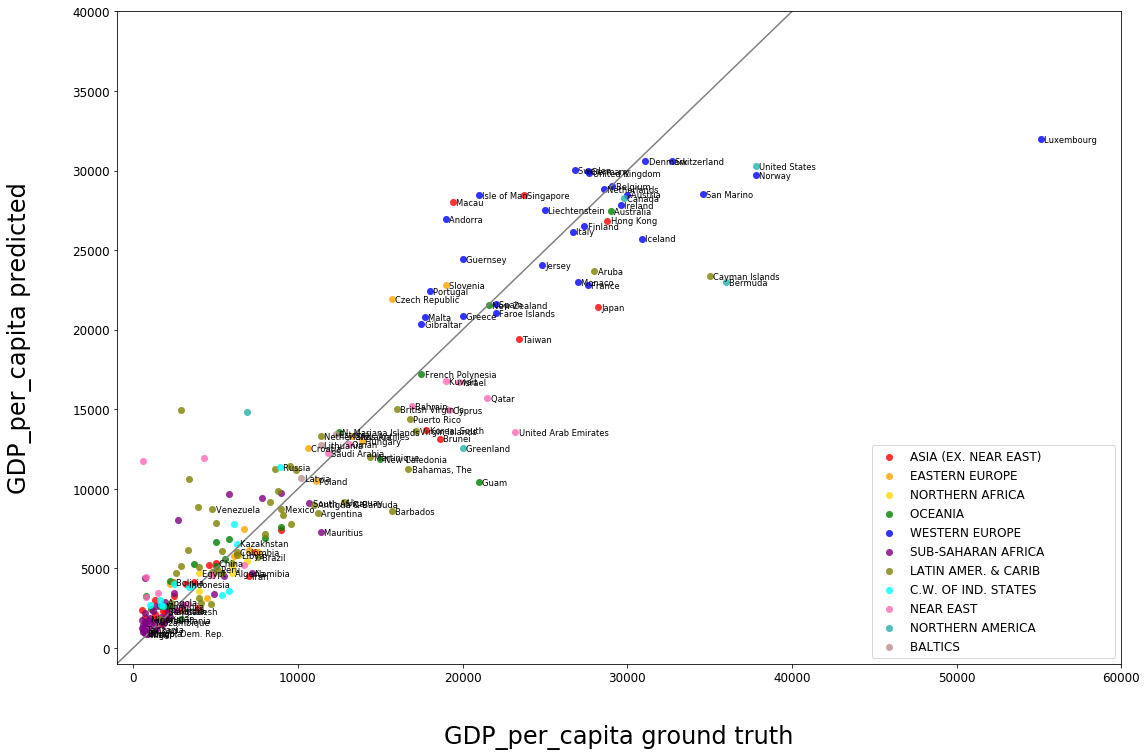

In [49]:
plt.figure(figsize=(18,12))

train_test_Y = train_Y.append(test_Y)
train_test_pred_Y = train_pred_Y.append(test_pred_Y)

data_shuffled = data.loc[train_test_Y.index]
label = data_shuffled['Country']

colors = {'ASIA (EX. NEAR EAST)         ':'red',
          'EASTERN EUROPE                     ':'orange',
          'NORTHERN AFRICA                    ':'gold',
          'OCEANIA                            ':'green',
          'WESTERN EUROPE                     ':'blue',
          'SUB-SAHARAN AFRICA                 ':'purple',
          'LATIN AMER. & CARIB    ':'olive',
          'C.W. OF IND. STATES ':'cyan',
          'NEAR EAST                          ':'hotpink',
          'NORTHERN AMERICA                   ':'lightseagreen',
          'BALTICS                            ':'rosybrown'}

for region, color in colors.items():
    X = train_test_Y.loc[data_shuffled['Region']==region]
    Y = train_test_pred_Y.loc[data_shuffled['Region']==region]
    ax = sns.regplot(x=X, y=Y, marker='.', fit_reg=False, color=color, scatter_kws={'s':200, 'linewidths':0}, label=region) 
plt.legend(loc=4,prop={'size': 12})  

ax.set_xlabel('GDP_per_capita ground truth',labelpad=40)
ax.set_ylabel('GDP_per_capita predicted',labelpad=40)
ax.xaxis.label.set_fontsize(24)
ax.yaxis.label.set_fontsize(24)
ax.tick_params(labelsize=12)

x = np.linspace(-1000,50000,100) # 100 linearly spaced numbers
y = x
plt.plot(x,y,c='gray')

plt.xlim(-1000,60000)
plt.ylim(-1000,40000)

for i in range(0,train_test_Y.shape[0]):
    if((data_shuffled['Area_sq_mi'].iloc[i]>8e5) |
       (data_shuffled['Population'].iloc[i]>1e8) |
       (data_shuffled['GDP_per_capita'].iloc[i]>10000)):
        plt.text(train_test_Y.iloc[i]+200, train_test_pred_Y.iloc[i]-200, label.iloc[i], size='small')

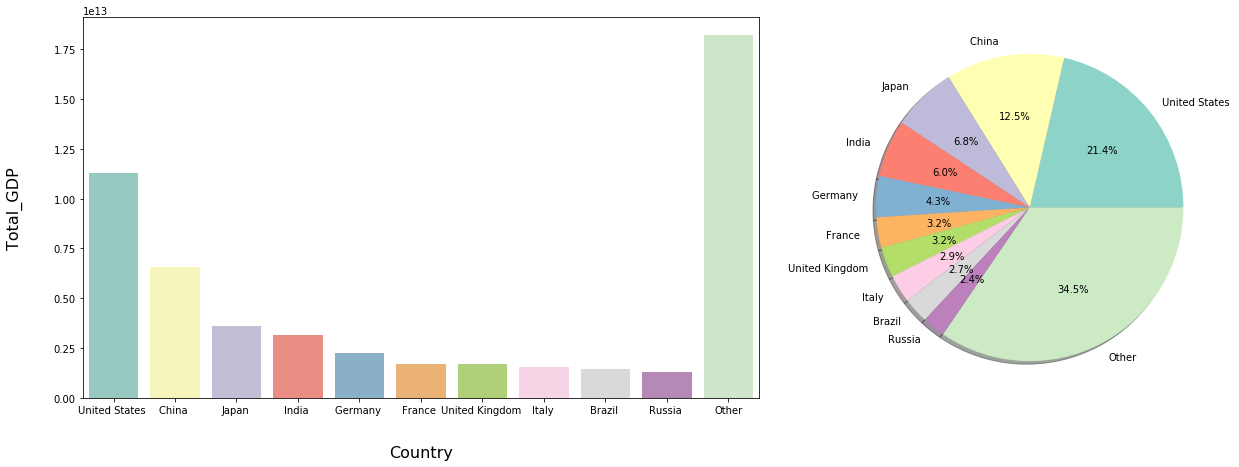

In [50]:
data['Total_GDP ($)'] = data['GDP_per_capita'] * data['Population']
#plt.figure(figsize=(16,6))
top_gdp_countries = data.sort_values('Total_GDP ($)',ascending=False).head(10)
other = pd.DataFrame({'Country':['Other'], 'Total_GDP ($)':[data['Total_GDP ($)'].sum() - top_gdp_countries['Total_GDP ($)'].sum()]})
gdps = pd.concat([top_gdp_countries[['Country','Total_GDP ($)']],other],ignore_index=True)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,7),gridspec_kw = {'width_ratios':[2,1]})
sns.barplot(x='Country',y='Total_GDP ($)',data=gdps,ax=axes[0],palette='Set3')
axes[0].set_xlabel('Country',labelpad=30,fontsize=16)
axes[0].set_ylabel('Total_GDP',labelpad=30,fontsize=16)

colors = sns.color_palette("Set3", gdps.shape[0]).as_hex()
axes[1].pie(gdps['Total_GDP ($)'], labels=gdps['Country'],colors=colors,autopct='%1.1f%%',shadow=True)
axes[1].axis('equal')
plt.show()

In [51]:
Rank1 = data[['Country','Total_GDP ($)']].sort_values('Total_GDP ($)', ascending=False).reset_index()
Rank2 = data[['Country','GDP_per_capita']].sort_values('GDP_per_capita', ascending=False).reset_index()
Rank1 = pd.Series(Rank1.index.values+1, index=Rank1.Country)
Rank2 = pd.Series(Rank2.index.values+1, index=Rank2.Country)
Rank_change = (Rank2-Rank1).sort_values(ascending=False)
print('rank of total GDP - rank of GDP per capita:')
Rank_change.loc[top_gdp_countries.Country]

rank of total GDP - rank of GDP per capita:


Country
United States        1
China              118
Japan               14
India              146
Germany             15
France              15
United Kingdom      12
Italy               17
Brazil              84
Russia              75
dtype: int64

In [52]:
corr_to_gdp = pd.Series()
for col in data.columns.values[2:]:
    if ((col!='Total_GDP ($)')&(col!='Climate')&(col!='GDP_per_capita')):
        corr_to_gdp[col] = data['Total_GDP ($)'].corr(data[col])
abs_corr_to_gdp = corr_to_gdp.abs().sort_values(ascending=False)
corr_to_gdp = corr_to_gdp.loc[abs_corr_to_gdp.index]
print(corr_to_gdp)

Population                          0.639528
Area_sq_mi                          0.556396
Phones_per_1000                     0.233484
Birthrate                          -0.166889
Agriculture                        -0.139516
Arable                              0.129928
Climate_label                       0.125791
Infant_mortality_per_1000_births   -0.122076
Literacy                            0.099417
Service                             0.085096
Region_label                       -0.079745
Crops                              -0.077078
Coastline_coast_or_area_ratio      -0.065211
Other                              -0.064882
Net_migration                       0.054632
Industry                            0.050399
Deathrate                          -0.035820
Pop_Density_per_sq_mi              -0.028487
dtype: float64


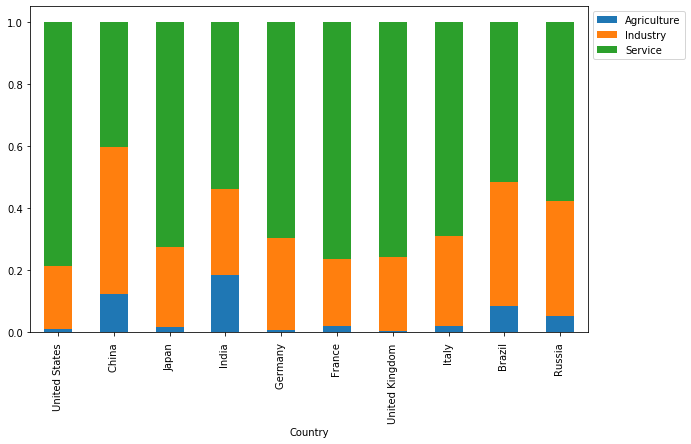

In [53]:
plot_data = top_gdp_countries.head(10)[['Country','Agriculture', 'Industry', 'Service']]
plot_data = plot_data.set_index('Country')
ax = plot_data.plot.bar(stacked=True,figsize=(10,6))
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

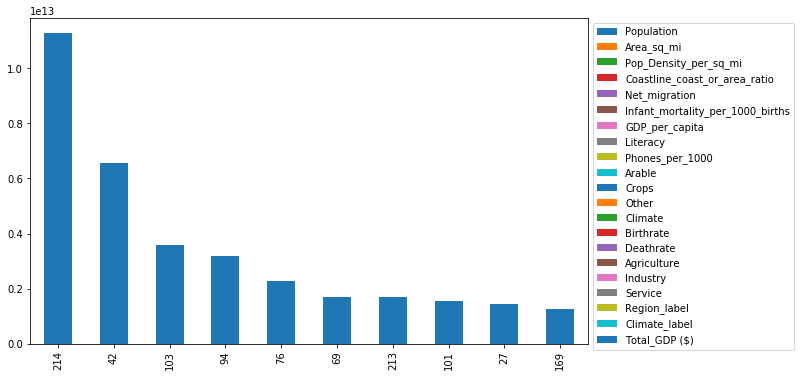

In [65]:
plot_data=top_gdp_countries.head(10)
[['Country','Agriculture','Industry','Service']]
ax = plot_data.plot.bar(stacked=True,figsize=(10,6))
ax.legend(bbox_to_anchor=(1, 1))
plt.show()